# Data analysis

Experiment information:
- One million function evaluations
- **sade_remc**: is the best method from HM, but with more evals
- **sade_mc_final**: is sade + MC + ffi9 + rmsd crowding + spicker + hooke jeeves on cluster centroids
- **sade_remc_final**: is the same as above, but REMC instead of MC
- **sade_mc_ffi9_02**: is HM method + forced fragment insertion of size 2 with 0.02 chance of happening per individal per generation
- **sade_remc_ffi9_02**: same as above but with REMC instead of MC

In [1]:
import datetime
import string
import random
import pickle
import time
import sys
import os
import re

import data_utils

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid");

In [2]:
root_path = '/home/h3nnn4n/progs/de_supimpa/tools/notebooks/analysis'
base_path = '/home/h3nnn4n/progs/de_supimpa/src'


def reset_path():
    os.chdir(base_path)
    
def reset_to_root_path():
    os.chdir(root_path)

    
reset_to_root_path()
reset_path()

In [3]:
runs = [
    'de_experiment_final',
    'de_sade_remc',
    'de_rosetta',
    'de_ffi'
]

In [4]:
dataset = data_utils.load_all_data(runs)
alldata = data_utils.merge_data(dataset)

INFO: Loaded 4 experiment runs dataset


In [5]:
def pretty_print_experiment_summary(experiment_summary):
    def protein_summary_print(p_data):
        keys = sorted(p_data.keys())

        for key in keys:
            experiment = p_data[key]
            name = key
            data = experiment['data']

            print('%25s    min: %8.2f  mean: %8.2f  std: %8.2f' % (
                name, data['min'], data['mean'], data['std']
            ))
    
    for protein in sorted(experiment_summary.keys()):
        print()
        print(protein.upper())

        protein_summary_print(experiment_summary[protein])

## Experiment Summary with *Best by Energy*

### RMSD data

In [6]:
experiment_summary_rmsd = data_utils.experiment_summary(alldata, mode='best_by_energy', metric='rmsd_after')
pretty_print_experiment_summary(experiment_summary_rmsd)


1AIL
         classic-abinitio    min:     4.75  mean:     7.95  std:     1.56
          sade_mc_ffi9_02    min:     6.37  mean:     8.54  std:     1.15
            sade_mc_final    min:     5.69  mean:    10.15  std:     2.39
                sade_remc    min:     4.26  mean:     8.57  std:     1.42
        sade_remc_ffi9_02    min:     4.46  mean:     8.17  std:     1.36
          sade_remc_final    min:     6.25  mean:    10.55  std:     3.44

1CRN
         classic-abinitio    min:     4.30  mean:     6.57  std:     1.57
          sade_mc_ffi9_02    min:     4.15  mean:     8.60  std:     1.52
            sade_mc_final    min:     5.76  mean:     8.50  std:     1.27
                sade_remc    min:     4.27  mean:     8.74  std:     1.55
        sade_remc_ffi9_02    min:     5.06  mean:     8.50  std:     1.32
          sade_remc_final    min:     4.14  mean:     7.96  std:     1.75

1ENH
         classic-abinitio    min:     2.84  mean:     6.43  std:     1.28
          sade_mc_ff

## Energy data 

In [7]:
experiment_summary_scorefxn = data_utils.experiment_summary(alldata, mode='best_by_energy', metric='scorefxn')
pretty_print_experiment_summary(experiment_summary_scorefxn)


1AIL
         classic-abinitio    min:  -172.76  mean:  -131.39  std:    19.03
          sade_mc_ffi9_02    min:  -153.65  mean:  -121.99  std:    19.02
            sade_mc_final    min:  -160.78  mean:  -138.59  std:    10.18
                sade_remc    min:  -167.59  mean:  -124.49  std:    16.50
        sade_remc_ffi9_02    min:  -160.07  mean:  -131.82  std:    17.00
          sade_remc_final    min:  -166.29  mean:  -134.65  std:    11.21

1CRN
         classic-abinitio    min:   -79.64  mean:   -60.92  std:     8.73
          sade_mc_ffi9_02    min:   -75.67  mean:   -53.17  std:     8.49
            sade_mc_final    min:   -75.86  mean:   -62.55  std:     6.50
                sade_remc    min:   -75.38  mean:   -54.99  std:    12.29
        sade_remc_ffi9_02    min:   -74.92  mean:   -54.47  std:     8.35
          sade_remc_final    min:   -84.79  mean:   -61.62  std:     7.38

1ENH
         classic-abinitio    min:  -138.48  mean:  -104.29  std:    20.83
          sade_mc_ff

## Experiment Summary with *Best by RMSD* 

## RMSD data

In [8]:
experiment_summary_scorefxn = data_utils.experiment_summary(alldata, mode='best_by_rmsd', metric='rmsd_after')
pretty_print_experiment_summary(experiment_summary_scorefxn)


1AIL
         classic-abinitio    min:     4.75  mean:     7.95  std:     1.56
          sade_mc_ffi9_02    min:     6.37  mean:     8.54  std:     1.15
            sade_mc_final    min:     4.92  mean:     7.69  std:     1.22
                sade_remc    min:     4.26  mean:     8.57  std:     1.42
        sade_remc_ffi9_02    min:     4.46  mean:     8.17  std:     1.36
          sade_remc_final    min:     4.79  mean:     7.57  std:     1.14

1CRN
         classic-abinitio    min:     4.30  mean:     6.57  std:     1.57
          sade_mc_ffi9_02    min:     4.15  mean:     8.60  std:     1.52
            sade_mc_final    min:     4.35  mean:     6.82  std:     0.98
                sade_remc    min:     4.27  mean:     8.74  std:     1.55
        sade_remc_ffi9_02    min:     5.06  mean:     8.50  std:     1.32
          sade_remc_final    min:     4.14  mean:     6.44  std:     0.87

1ENH
         classic-abinitio    min:     2.84  mean:     6.43  std:     1.28
          sade_mc_ff

## Energy Data

In [9]:
experiment_summary_scorefxn = data_utils.experiment_summary(alldata, mode='best_by_rmsd', metric='scorefxn')
pretty_print_experiment_summary(experiment_summary_scorefxn)


1AIL
         classic-abinitio    min:  -172.76  mean:  -131.39  std:    19.03
          sade_mc_ffi9_02    min:  -153.65  mean:  -121.99  std:    19.02
            sade_mc_final    min:  -152.81  mean:  -109.20  std:    30.51
                sade_remc    min:  -167.59  mean:  -124.49  std:    16.50
        sade_remc_ffi9_02    min:  -160.07  mean:  -131.82  std:    17.00
          sade_remc_final    min:  -166.29  mean:  -101.15  std:    38.71

1CRN
         classic-abinitio    min:   -79.64  mean:   -60.92  std:     8.73
          sade_mc_ffi9_02    min:   -75.67  mean:   -53.17  std:     8.49
            sade_mc_final    min:   -67.01  mean:   -38.71  std:    24.16
                sade_remc    min:   -75.38  mean:   -54.99  std:    12.29
        sade_remc_ffi9_02    min:   -74.92  mean:   -54.47  std:     8.35
          sade_remc_final    min:   -84.79  mean:   -40.05  std:    30.07

1ENH
         classic-abinitio    min:  -138.48  mean:  -104.29  std:    20.83
          sade_mc_ff

# Plots

In [37]:
def summary_to_dataframe(summary, columns=['min', 'max', 'mean', 'std', 'median']):
    proteins = sorted(list(summary.keys()))
    methods = sorted(list(summary[proteins[0]].keys()))
    base_columns = ['protein', 'experiment']
    
    d = {}
    for column in columns + base_columns:
        d[column] = []
    
    for protein in proteins:
        for method in methods:
            d['protein'].append(protein)
            d['experiment'].append(method)
            
            for column in columns:
                d[column].append(summary[protein][method]['data'][column])
                                
    return pd.DataFrame(data=d)

## Plots using **Best by Energy**

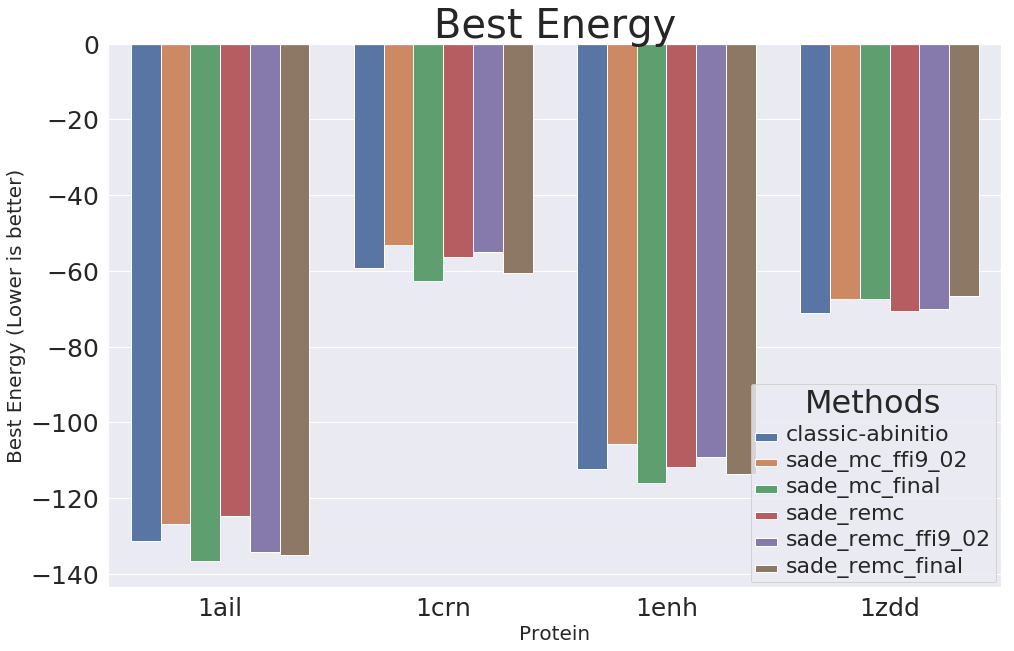

In [53]:
summary = data_utils.experiment_summary(alldata, mode='best_by_energy', metric='scorefxn')
df = summary_to_dataframe(summary)

sns.set(rc={'figure.figsize':(16, 10)})

plot = sns.barplot(x='protein', y='median', hue='experiment', data=df)
plot.set_title('Best Energy', fontsize=40)
plot.set_ylabel('Best Energy (Lower is better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp1_best_energy.png')

plot

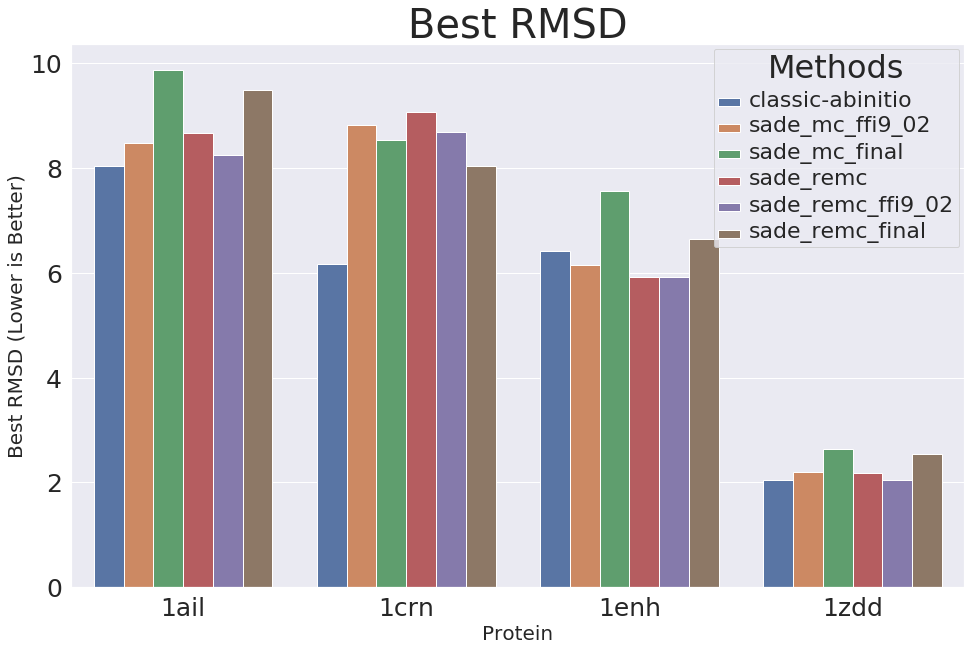

In [55]:
summary = data_utils.experiment_summary(alldata, mode='best_by_energy', metric='rmsd_after')
df = summary_to_dataframe(summary)

plot = sns.barplot(x='protein', y='median', hue='experiment', data=df)
plot.set_title('Best RMSD', fontsize=40)
plot.set_ylabel('Best RMSD (Lower is Better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp1_best_rmsd.png')

plot

## Plots using Best by RMSD

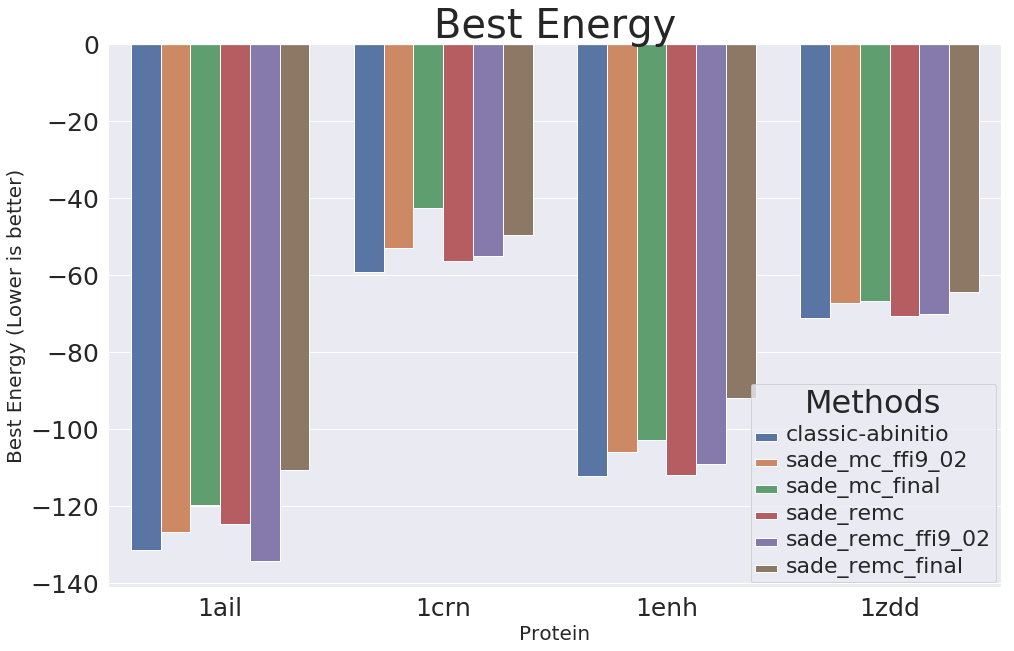

In [57]:
summary = data_utils.experiment_summary(alldata, mode='best_by_rmsd', metric='scorefxn')
df = summary_to_dataframe(summary)

sns.set(rc={'figure.figsize':(16, 10)})

plot = sns.barplot(x='protein', y='median', hue='experiment', data=df)
plot.set_title('Best Energy', fontsize=40)
plot.set_ylabel('Best Energy (Lower is better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp2_best_energy.png')

plot

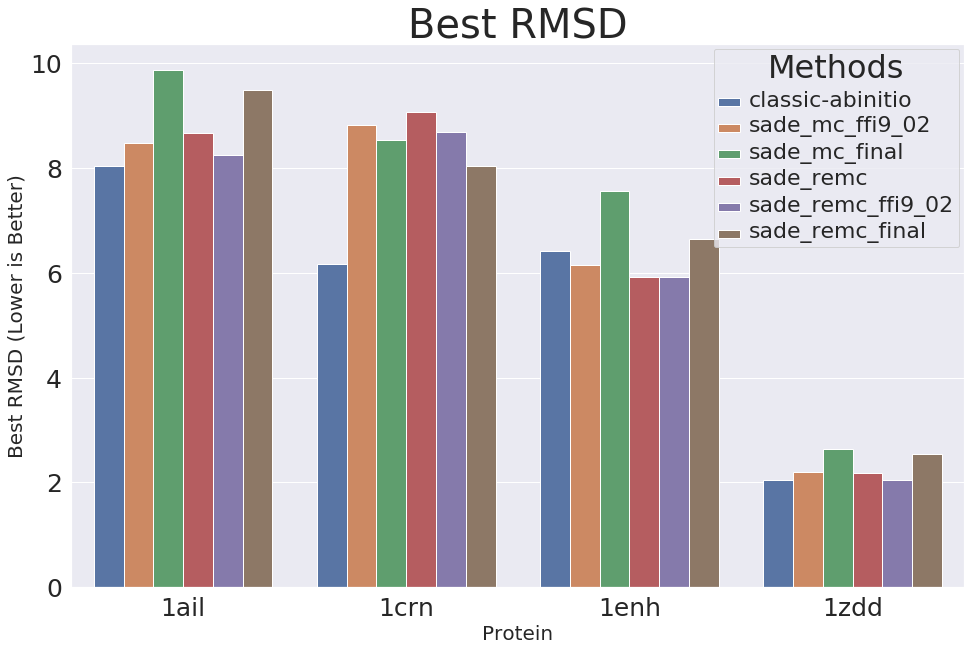

In [58]:
summary = data_utils.experiment_summary(alldata, mode='best_by_energy', metric='rmsd_after')
df = summary_to_dataframe(summary)

plot = sns.barplot(x='protein', y='median', hue='experiment', data=df)
plot.set_title('Best RMSD', fontsize=40)
plot.set_ylabel('Best RMSD (Lower is Better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp2_best_rmsd.png')

plot

## Pareto

In [228]:
def is_pareto_front(df, row, xlabel, ylabel):
    x = row[xlabel]
    y = row[ylabel]
    
    is_min_x = df.loc[df[ylabel] == y].min()[xlabel] <= x
    is_min_y = df.loc[df[xlabel] == x].min()[ylabel] <= y
    
    is_double = len(df.loc[(df[xlabel] < x) & (df[ylabel] < y)]) < 1 
    
    return is_min_x and is_min_y and is_double


def pareto(protein, mode='best_by_rmsd', metric='mean'):
    summary_rmsd = data_utils.experiment_summary(alldata, mode=mode, metric='rmsd_after')
    df_rmsd = summary_to_dataframe(summary_rmsd)

    summary_energy = data_utils.experiment_summary(alldata, mode=mode, metric='scorefxn')
    df_energy = summary_to_dataframe(summary_energy)

    df_rmsd = df_rmsd[df_rmsd.protein == protein]
    df_energy = df_energy[df_energy.protein == protein]
    
    df = pd.DataFrame(
        [df_rmsd[metric], df_energy[metric], df_rmsd['experiment']],
        index=['rmsd', 'energy', 'experiment']
    ).transpose()
    
    is_pareto = df.apply(lambda row: is_pareto_front(df, row, 'rmsd', 'energy'), axis=1)
    df_pareto = df.loc[is_pareto].sort_values(by=['rmsd'])

    plot = sns.scatterplot(x='rmsd', y='energy', hue='experiment', data=df, s=150)
    plt.plot(df_pareto['rmsd'], df_pareto['energy'], '--', label='Pareto frontier', alpha=0.5)
    
    plot.set_title('Pareto for %s using %s' % (protein, metric), fontsize=40)
    plot.set_ylabel('Energy (Lower is better)', fontsize=20)
    plot.set_xlabel('RMSD (Lower is better)', fontsize=20)
    plot.tick_params(labelsize=25)

    plt.setp(plot.get_legend().get_texts(), fontsize='22')
    plt.setp(plot.get_legend().get_title(), fontsize='32')

    plot.get_legend().set_title('Methods')

    name = '%s_%s_%s.png' % (
        protein,
        mode,
        metric
    )
    
    plot.get_figure().savefig(name)

    return plot

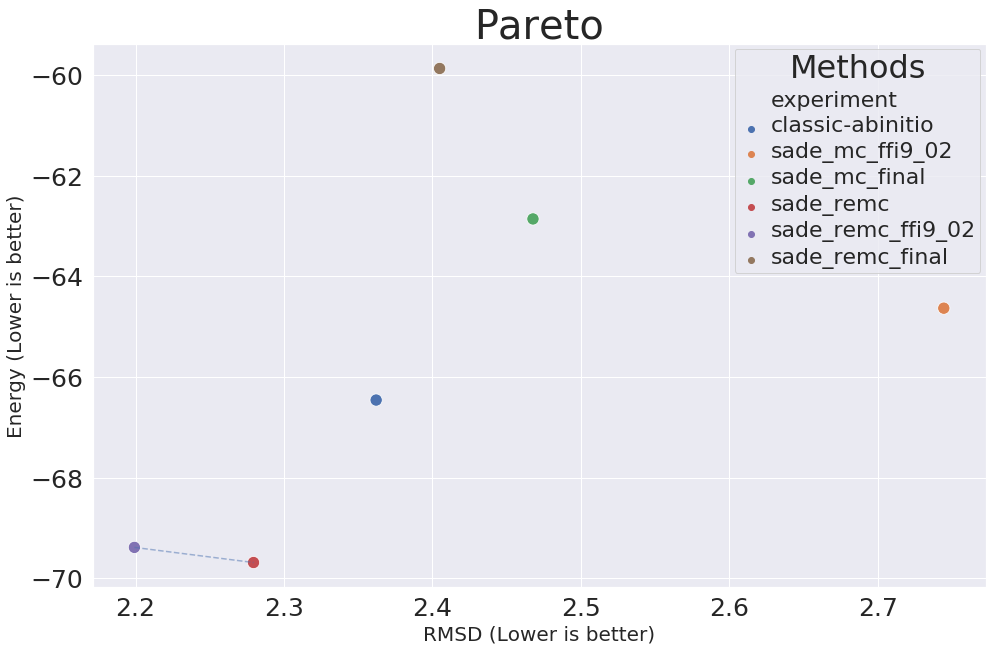

In [214]:
pareto('1zdd')

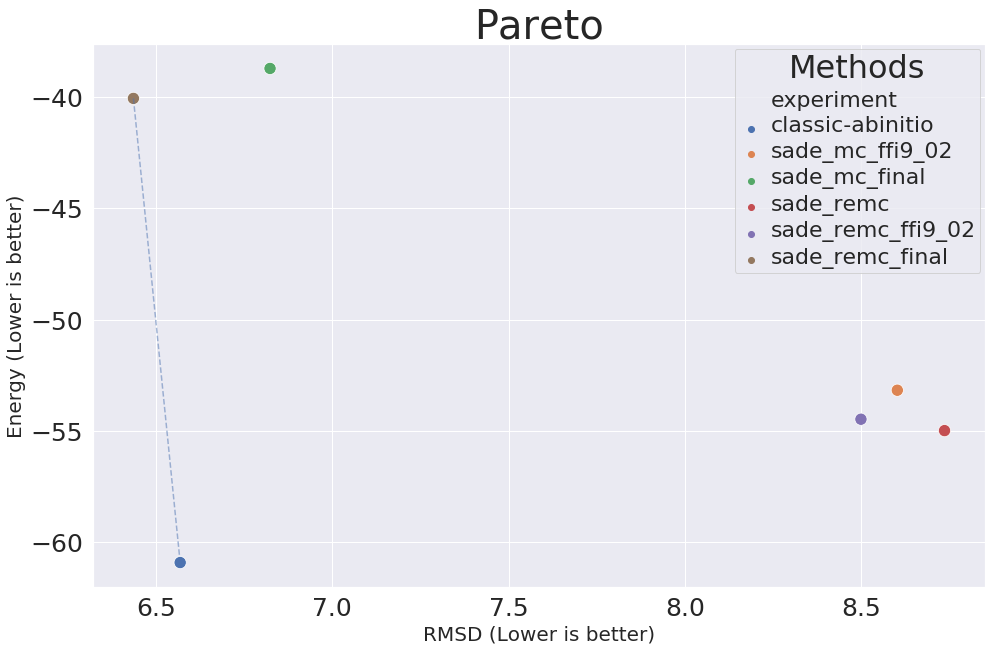

In [215]:
pareto('1crn')

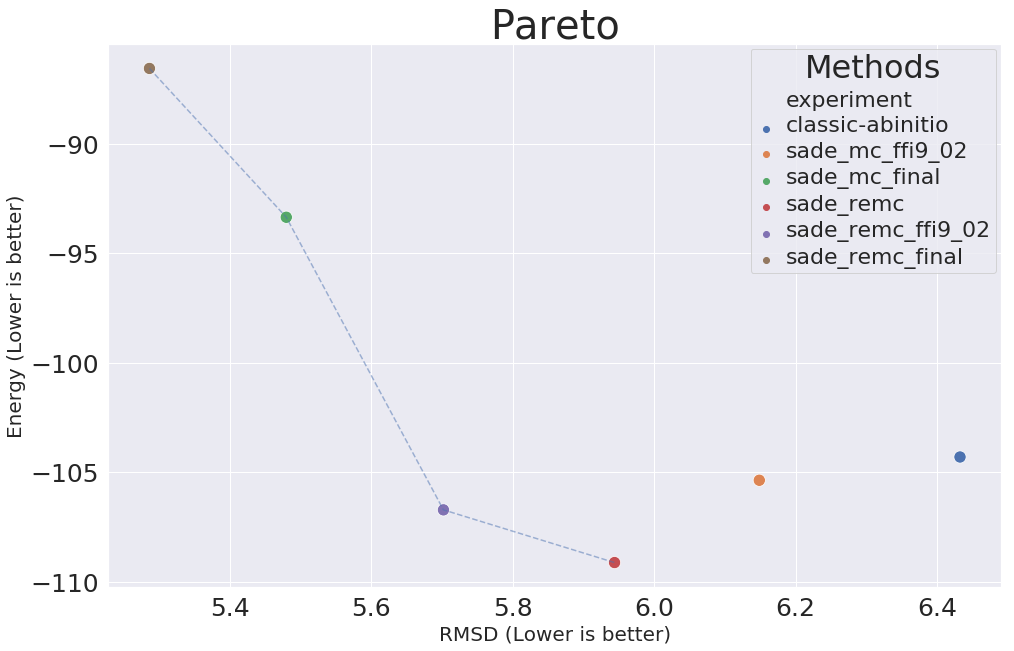

In [216]:
pareto('1enh')

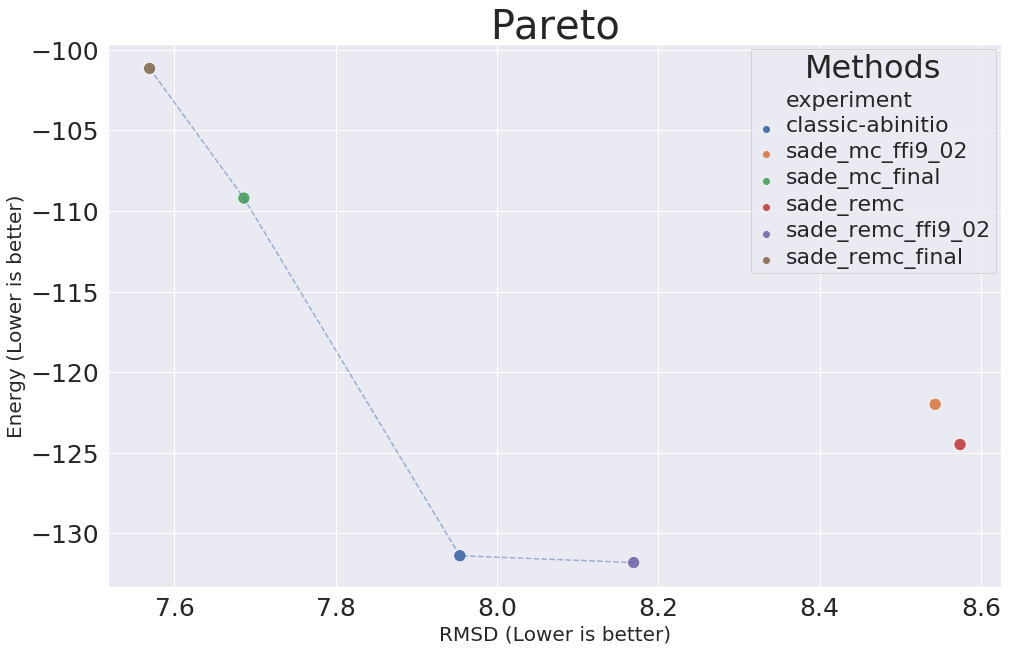

In [217]:
pareto('1ail')

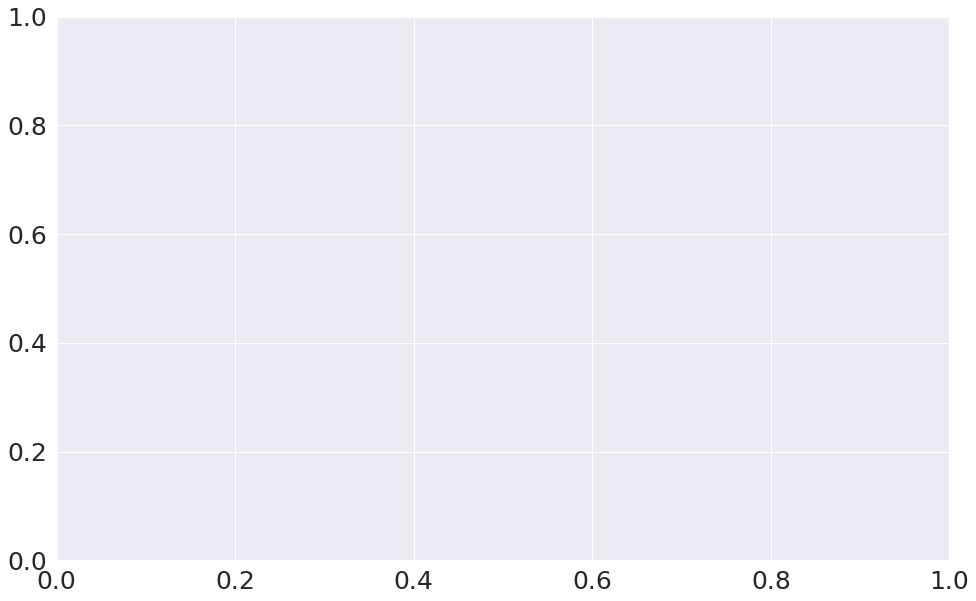

In [229]:
for protein in alldata.keys():
    pareto(protein=protein, mode='best_by_rmsd', metric='mean').clear();
    pareto(protein=protein, mode='best_by_energy', metric='mean').clear();